In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet


In [ ]:
# Load the cleaned data
cleaned_file_path = r"C:\Code\energy-demand-forecasting\data\processed\cleaned_energy_data.csv"
data_cleaned = pd.read_csv(cleaned_file_path)

# Preview the dataset
print(data_cleaned.head())

# Check the structure of the dataset
print(data_cleaned.info())


  Data_Status State    MSN  Year  Energy_Value
0       2022F    AK  ABICB  1960           0.0
1       2022F    AK  ARICB  1960         312.0
2       2022F    AK  ARTCB  1960         312.0
3       2022F    AK  ARTXB  1960         312.0
4       2022F    AK  AVACB  1960        5209.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 930699 entries, 0 to 930698
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Data_Status   930699 non-null  object 
 1   State         930699 non-null  object 
 2   MSN           930699 non-null  object 
 3   Year          930699 non-null  int64  
 4   Energy_Value  930699 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 35.5+ MB
None


   Year  Energy_Value
0  1960  2.071745e+09
1  1961  2.103689e+09
2  1962  2.198996e+09
3  1963  2.290121e+09
4  1964  2.390336e+09


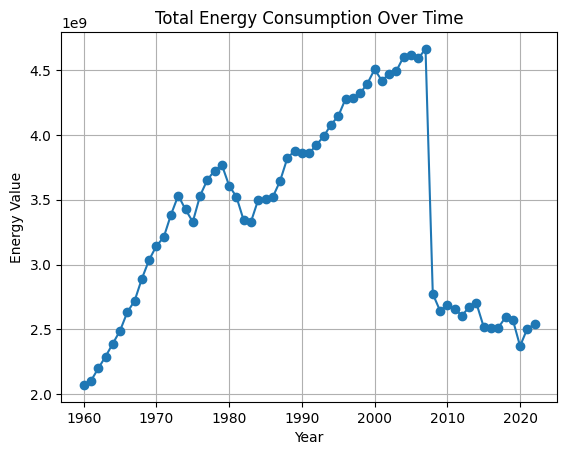

In [4]:
# Aggregate energy consumption by year
total_energy = data_cleaned.groupby('Year')['Energy_Value'].sum().reset_index()

# Display the aggregated data
print(total_energy.head())

# Plot the trend over time
plt.plot(total_energy['Year'], total_energy['Energy_Value'], marker='o')
plt.title('Total Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Energy Value')
plt.grid()
plt.show()


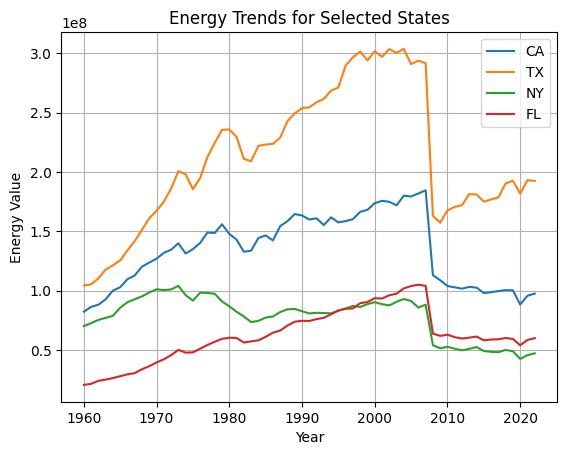

In [6]:
# Aggregate by state and year
statewise_energy = data_cleaned.groupby(['State', 'Year'])['Energy_Value'].sum().reset_index()

# Plot trends for selected states
for state in ['CA', 'TX', 'NY', 'FL']:
    state_data = statewise_energy[statewise_energy['State'] == state]
    plt.plot(state_data['Year'], state_data['Energy_Value'], label=state)

plt.title('Energy Trends for Selected States')
plt.xlabel('Year')
plt.ylabel('Energy Value')
plt.legend()
plt.grid()
plt.show()


In [10]:
# Load nuclear-related MSN codes
nuclear_msn_path = r"C:\Code\energy-demand-forecasting\docs\nuclear_related_msn_codes.csv"
nuclear_msn = pd.read_csv(nuclear_msn_path)

# Preview the nuclear MSN codes
print(nuclear_msn.head())



   Index    MSN                                        Description  \
0    NaN  BTVHN   Battery electric vehicle (BEV) light-duty stocks   
1    NaN  BTVHP  Electricity consumed for battery electric vehi...   
2    NaN  CLEIB         Coal consumed by the electric power sector   
3    NaN  CLEID            Coal price in the electric power sector   
4    NaN  CLEIK  Factor for converting coal consumed by the ele...   

                               Unit  
0  Thousands of registered vehicles  
1             Million kilowatthours  
2                       Billion Btu  
3           Dollars per million Btu  
4         Million Btu per short ton  


In [11]:
# Filter cleaned data for nuclear-related MSN codes
nuclear_data = data_cleaned[data_cleaned['MSN'].isin(nuclear_msn['MSN'])]

# Preview the filtered data
print(nuclear_data.head())


   Data_Status State    MSN  Year  Energy_Value
20       2022F    AK  BTVHN  1960   1683.777778
21       2022F    AK  BTVHP  1960   1284.333333
27       2022F    AK  CLEIB  1960    914.000000
39       2022F    AK  DFEIB  1960    554.000000
44       2022F    AK  DKEIB  1960    554.000000


In [12]:
# Aggregate energy consumption for nuclear-related MSNs
msnwise_energy = nuclear_data.groupby(['MSN', 'Year'])['Energy_Value'].sum().reset_index()

# Preview the aggregated data
print(msnwise_energy.head())


     MSN  Year   Energy_Value
0  BTVHN  1960  633486.555556
1  BTVHN  1961  592188.111111
2  BTVHN  1962  592361.444444
3  BTVHN  1963  603573.333333
4  BTVHN  1964  611124.555556


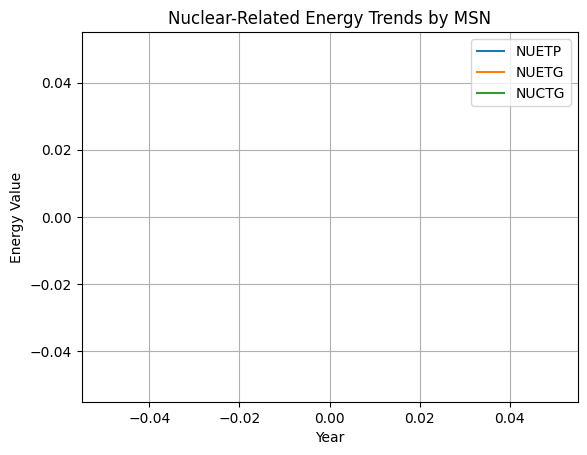

In [13]:
# Plot trends for selected nuclear-related MSNs
selected_msn = ['NUETP', 'NUETG', 'NUCTG']  # Replace with relevant MSN codes from your dataset

for msn in selected_msn:
    msn_data = msnwise_energy[msnwise_energy['MSN'] == msn]
    plt.plot(msn_data['Year'], msn_data['Energy_Value'], label=msn)

plt.title('Nuclear-Related Energy Trends by MSN')
plt.xlabel('Year')
plt.ylabel('Energy Value')
plt.legend()
plt.grid()
plt.show()


In [21]:
# Filter top MSNs by total energy consumption
top_msn = msnwise_energy.groupby('Label')['Energy_Value'].sum().nlargest(5).index
filtered_data = msnwise_energy[msnwise_energy['Label'].isin(top_msn)]


C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\565620401.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1960-01-01 00:00:00', '1961-01-01 00:00:00', '1962-01-01 00:00:00',
 '1963-01-01 00:00:00', '1964-01-01 00:00:00', '1965-01-01 00:00:00',
 '1966-01-01 00:00:00', '1967-01-01 00:00:00', '1968-01-01 00:00:00',
 '1969-01-01 00:00:00', '1970-01-01 00:00:00', '1971-01-01 00:00:00',
 '1972-01-01 00:00:00', '1973-01-01 00:00:00', '1974-01-01 00:00:00',
 '1975-01-01 00:00:00', '1976-01-01 00:00:00', '1977-01-01 00:00:00',
 '1978-01-01 00:00:00', '1979-01-01 00:00:00', '1980-01-01 00:00:00',
 '1981-01-01 00:00:00', '1982-01-01 00:00:00', '1983-01-01 00:00:00',
 '1984-01-01 00:00:00', '1985-01-01 00:00:00', '1986-01-01 00:00:00',
 '1987-01-01 00:00:00', '1988-01-01 00:00:00', '1989-01-01 00:00:00',
 '1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00',
 '1993-01-01 00:00:00', '1994

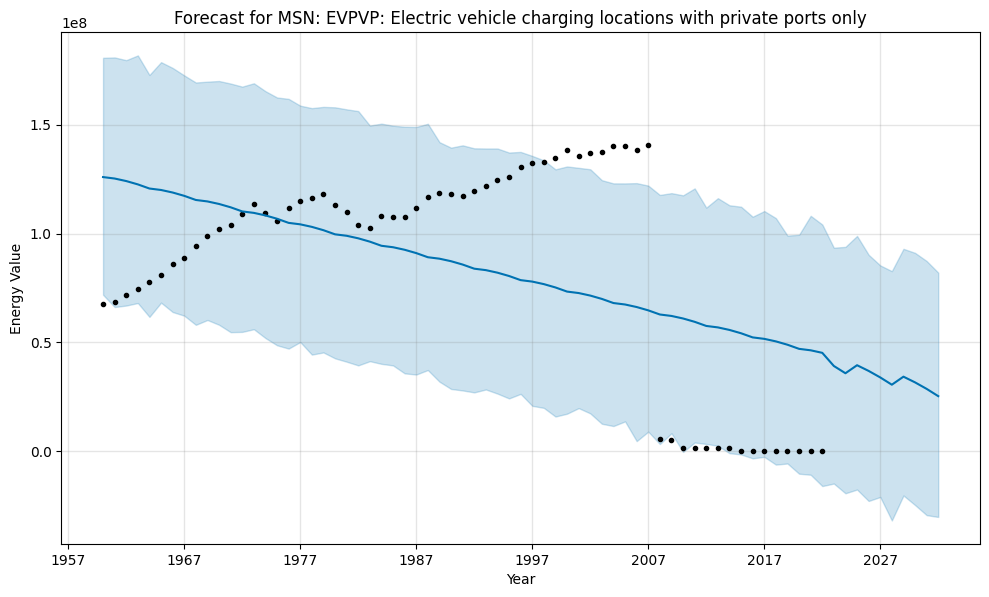

C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\565620401.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1960-01-01 00:00:00', '1961-01-01 00:00:00', '1962-01-01 00:00:00',
 '1963-01-01 00:00:00', '1964-01-01 00:00:00', '1965-01-01 00:00:00',
 '1966-01-01 00:00:00', '1967-01-01 00:00:00', '1968-01-01 00:00:00',
 '1969-01-01 00:00:00', '1970-01-01 00:00:00', '1971-01-01 00:00:00',
 '1972-01-01 00:00:00', '1973-01-01 00:00:00', '1974-01-01 00:00:00',
 '1975-01-01 00:00:00', '1976-01-01 00:00:00', '1977-01-01 00:00:00',
 '1978-01-01 00:00:00', '1979-01-01 00:00:00', '1980-01-01 00:00:00',
 '1981-01-01 00:00:00', '1982-01-01 00:00:00', '1983-01-01 00:00:00',
 '1984-01-01 00:00:00', '1985-01-01 00:00:00', '1986-01-01 00:00:00',
 '1987-01-01 00:00:00', '1988-01-01 00:00:00', '1989-01-01 00:00:00',
 '1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00',
 '1993-01-01 00:00:00', '1994

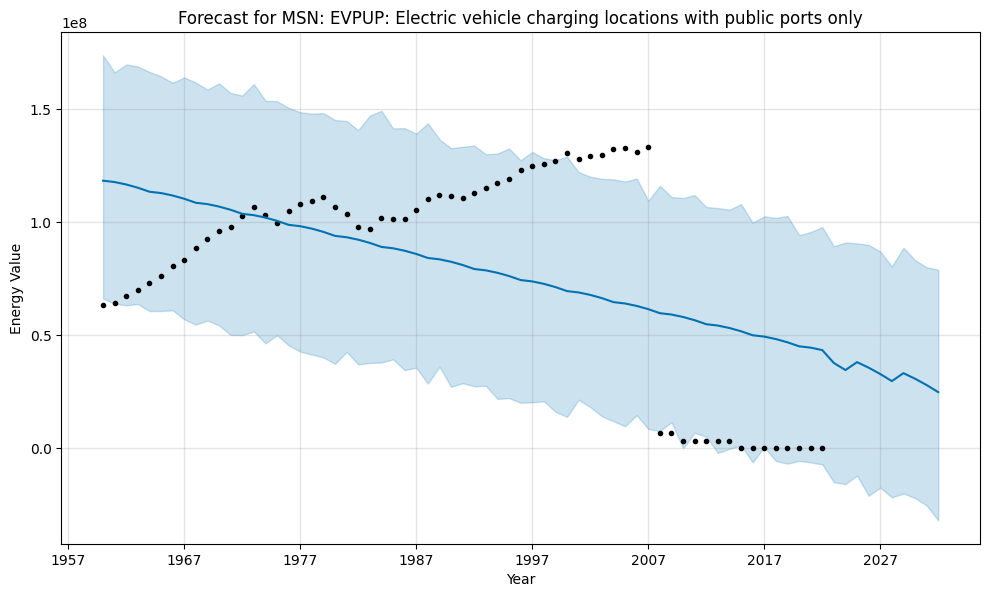

C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\565620401.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1960-01-01 00:00:00', '1961-01-01 00:00:00', '1962-01-01 00:00:00',
 '1963-01-01 00:00:00', '1964-01-01 00:00:00', '1965-01-01 00:00:00',
 '1966-01-01 00:00:00', '1967-01-01 00:00:00', '1968-01-01 00:00:00',
 '1969-01-01 00:00:00', '1970-01-01 00:00:00', '1971-01-01 00:00:00',
 '1972-01-01 00:00:00', '1973-01-01 00:00:00', '1974-01-01 00:00:00',
 '1975-01-01 00:00:00', '1976-01-01 00:00:00', '1977-01-01 00:00:00',
 '1978-01-01 00:00:00', '1979-01-01 00:00:00', '1980-01-01 00:00:00',
 '1981-01-01 00:00:00', '1982-01-01 00:00:00', '1983-01-01 00:00:00',
 '1984-01-01 00:00:00', '1985-01-01 00:00:00', '1986-01-01 00:00:00',
 '1987-01-01 00:00:00', '1988-01-01 00:00:00', '1989-01-01 00:00:00',
 '1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00',
 '1993-01-01 00:00:00', '1994

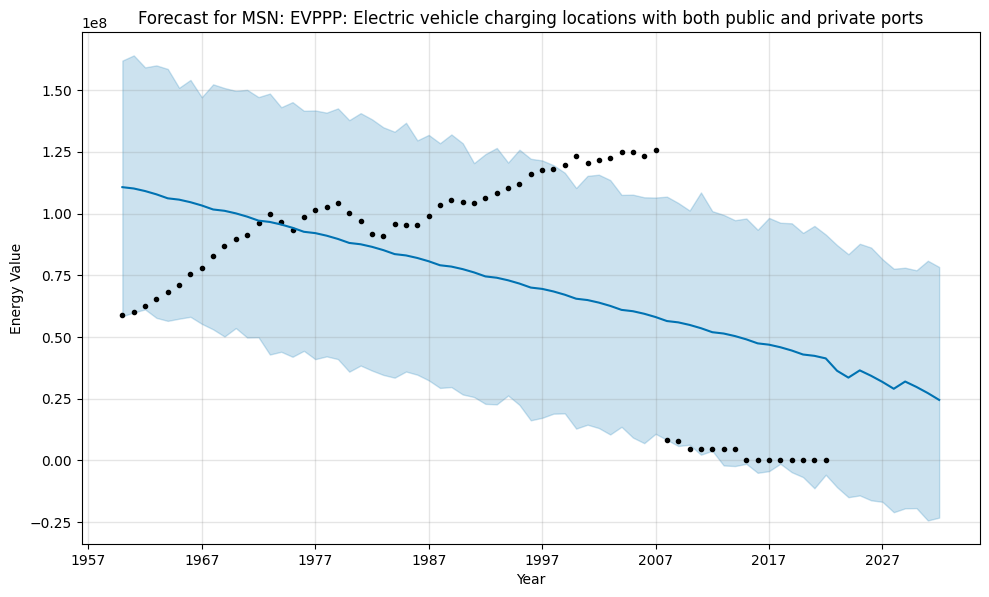

C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\565620401.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1960-01-01 00:00:00', '1961-01-01 00:00:00', '1962-01-01 00:00:00',
 '1963-01-01 00:00:00', '1964-01-01 00:00:00', '1965-01-01 00:00:00',
 '1966-01-01 00:00:00', '1967-01-01 00:00:00', '1968-01-01 00:00:00',
 '1969-01-01 00:00:00', '1970-01-01 00:00:00', '1971-01-01 00:00:00',
 '1972-01-01 00:00:00', '1973-01-01 00:00:00', '1974-01-01 00:00:00',
 '1975-01-01 00:00:00', '1976-01-01 00:00:00', '1977-01-01 00:00:00',
 '1978-01-01 00:00:00', '1979-01-01 00:00:00', '1980-01-01 00:00:00',
 '1981-01-01 00:00:00', '1982-01-01 00:00:00', '1983-01-01 00:00:00',
 '1984-01-01 00:00:00', '1985-01-01 00:00:00', '1986-01-01 00:00:00',
 '1987-01-01 00:00:00', '1988-01-01 00:00:00', '1989-01-01 00:00:00',
 '1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00',
 '1993-01-01 00:00:00', '1994

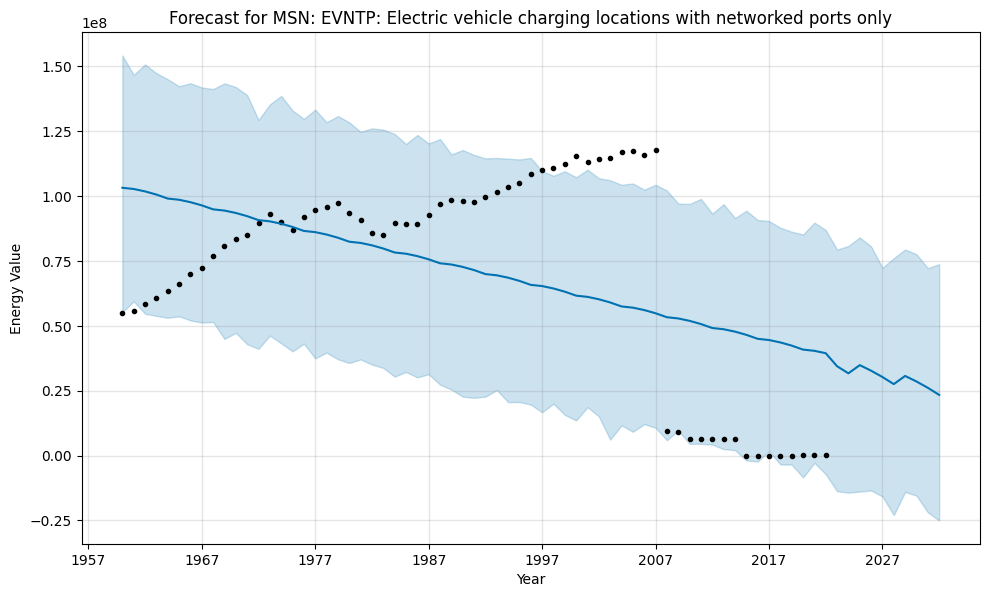

C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\565620401.py:7: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<DatetimeArray>
['1960-01-01 00:00:00', '1961-01-01 00:00:00', '1962-01-01 00:00:00',
 '1963-01-01 00:00:00', '1964-01-01 00:00:00', '1965-01-01 00:00:00',
 '1966-01-01 00:00:00', '1967-01-01 00:00:00', '1968-01-01 00:00:00',
 '1969-01-01 00:00:00', '1970-01-01 00:00:00', '1971-01-01 00:00:00',
 '1972-01-01 00:00:00', '1973-01-01 00:00:00', '1974-01-01 00:00:00',
 '1975-01-01 00:00:00', '1976-01-01 00:00:00', '1977-01-01 00:00:00',
 '1978-01-01 00:00:00', '1979-01-01 00:00:00', '1980-01-01 00:00:00',
 '1981-01-01 00:00:00', '1982-01-01 00:00:00', '1983-01-01 00:00:00',
 '1984-01-01 00:00:00', '1985-01-01 00:00:00', '1986-01-01 00:00:00',
 '1987-01-01 00:00:00', '1988-01-01 00:00:00', '1989-01-01 00:00:00',
 '1990-01-01 00:00:00', '1991-01-01 00:00:00', '1992-01-01 00:00:00',
 '1993-01-01 00:00:00', '1994

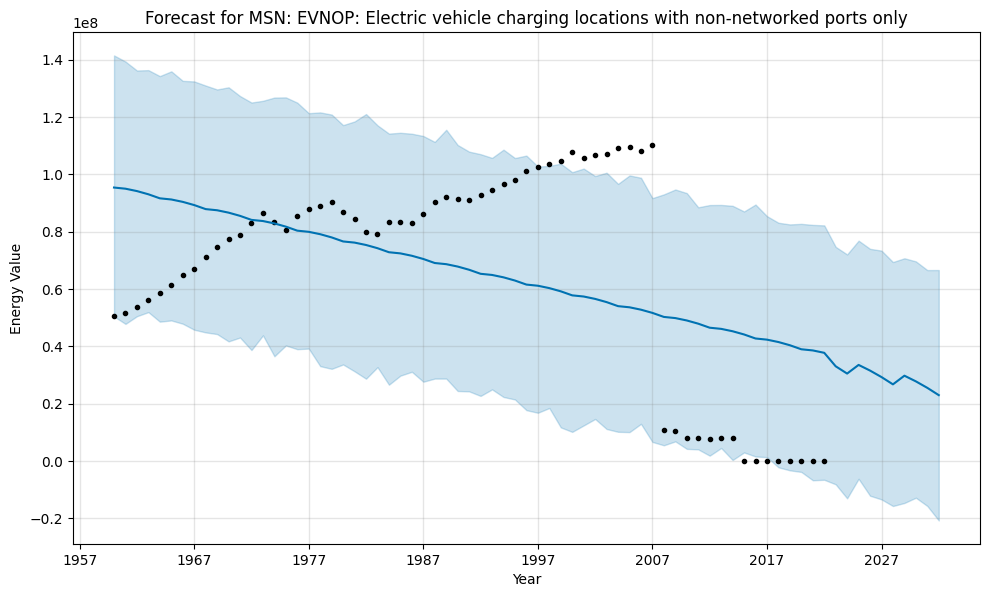

In [24]:
# Forecast trends for each MSN
forecasts = {}
for msn in top_msn:
    # Filter data for a specific MSN
    msn_data = filtered_data[filtered_data['Label'] == msn][['Year', 'Energy_Value']]
    msn_data = msn_data.rename(columns={'Year': 'ds', 'Energy_Value': 'y'})
    msn_data.loc[:, 'ds'] = pd.to_datetime(msn_data['ds'], format='%Y')  # Ensure Year is in datetime format

    # Initialize and fit Prophet model
    model = Prophet()
    model.fit(msn_data)

    # Create future dates for forecasting (e.g., next 10 years)
    future = model.make_future_dataframe(periods=10, freq='Y')
    forecast = model.predict(future)

    # Store the forecast
    forecasts[msn] = {'actual': msn_data, 'forecast': forecast}

    # Plot the forecast
    fig = model.plot(forecast)
    plt.title(f"Forecast for MSN: {msn}")
    plt.xlabel("Year")
    plt.ylabel("Energy Value")
    plt.show()


C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\3675375199.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\3675375199.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\mathe\AppData\Local\Temp\ipykernel_10612\3675375199.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

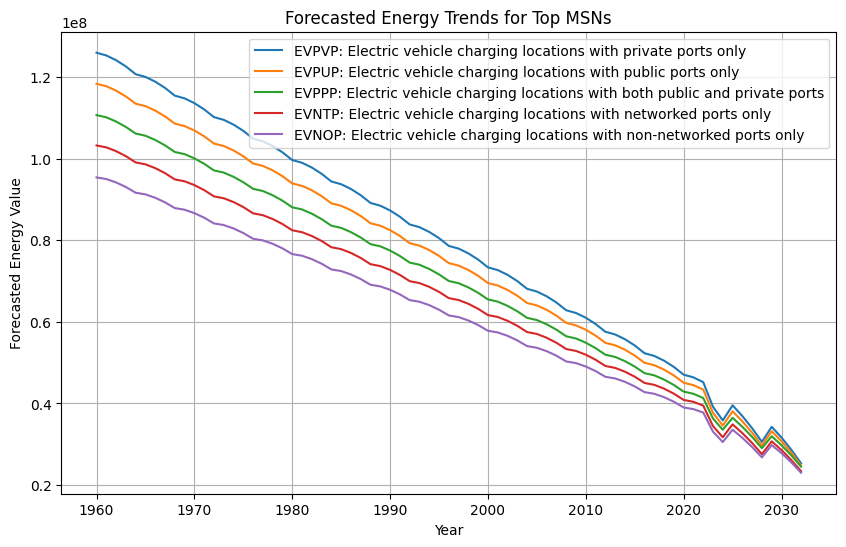

In [23]:
# Combine all forecasts for comparison
all_forecasts = pd.DataFrame()
for msn, data in forecasts.items():
    forecast = data['forecast'][['ds', 'yhat']]
    forecast['MSN'] = msn
    all_forecasts = pd.concat([all_forecasts, forecast])

# Plot forecasts for all MSNs
plt.figure(figsize=(10, 6))
for msn in top_msn:
    msn_forecast = all_forecasts[all_forecasts['MSN'] == msn]
    plt.plot(msn_forecast['ds'], msn_forecast['yhat'], label=msn)

plt.title('Forecasted Energy Trends for Top MSNs')
plt.xlabel('Year')
plt.ylabel('Forecasted Energy Value')
plt.legend()
plt.grid()
plt.show()
